**一、加载数据**

In [0]:
# 加载数据
import pickle

# 数据集所在的文件位置
training_file = "/content/drive/traffic-signs-data/train.p"
validation_file = "/content/drive/traffic-signs-data/valid.p"
testing_file = "/content/drive/traffic-signs-data/test.p"

# 打开文件
with open(training_file,mode="rb") as f:
  train = pickle.load(f)
with open(validation_file,mode="rb") as f:
  valid = pickle.load(f)
with open(testing_file,mode="rb") as f:
  test = pickle.load(f)

# 获取数据集的特征及标签数据
X_train,y_train = train["features"],train["labels"]
X_valid,y_valid = valid["features"],valid["labels"]
X_test,y_test = test["features"],test["labels"]

In [0]:
# 查看数据量
print("Number of training examples =",X_train.shape[0])
print("Number of validtion examples =",X_valid.shape[0])
print("Number of testing examples=",X_test.shape[0])

# 查看数据格式
print("Image data shape =",X_train.shape[1:])

Number of training examples = 34799
Number of validtion examples = 4410
Number of testing examples= 12630
Image data shape = (32, 32, 3)


In [0]:
# 查看数据的标签的数量
import numpy as np

sum = np.unique(y_train)
print("number of classes =",len(sum))

number of classes = 43


In [0]:
# 查看标签数据
import pandas as pd

sign_names_file = "/content/drive/traffic-signs-data/signnames.csv"
sign_names = pd.read_csv(sign_names_file)
print(sign_names)

    ClassId                                           SignName
0         0                               Speed limit (20km/h)
1         1                               Speed limit (30km/h)
2         2                               Speed limit (50km/h)
3         3                               Speed limit (60km/h)
4         4                               Speed limit (70km/h)
5         5                               Speed limit (80km/h)
6         6                        End of speed limit (80km/h)
7         7                              Speed limit (100km/h)
8         8                              Speed limit (120km/h)
9         9                                         No passing
10       10       No passing for vehicles over 3.5 metric tons
11       11              Right-of-way at the next intersection
12       12                                      Priority road
13       13                                              Yield
14       14                                            

In [0]:
# 定义将标签id转换成name的函数
sign_names = np.array(sign_names)
def id_to_name(id):
  return sign_names[id][1]

In [0]:
# 验证是否id_to_name函数
id_to_name(0)

'Speed limit (20km/h)'

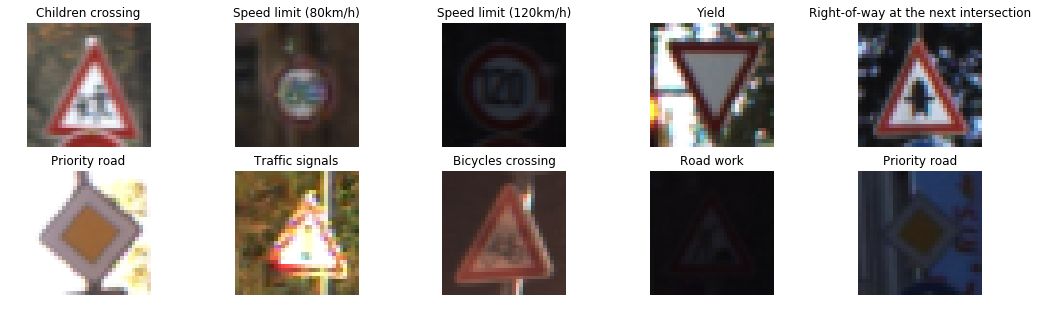

In [0]:
# 绘制交通标志图
import matplotlib.pyplot as plt
%matplotlib inline

fig,axes = plt.subplots(2,5,figsize=(18,5))
ax_array = axes.ravel()
for ax in ax_array:
  index = np.random.randint(0,len(X_train))
  ax.imshow(X_train[index])
  ax.axis("off")
  ax.set_title(id_to_name(y_train[index]))
plt.show()

(34799, 32, 32, 3)
(34799,)


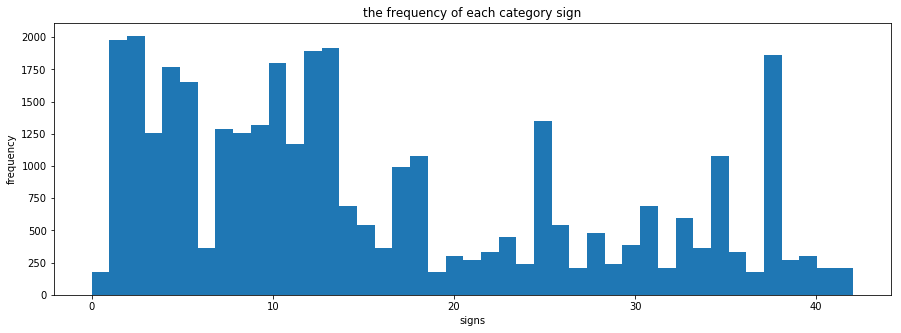

In [0]:
# 直方图来展示图像训练集的各个类别的分布情况
n_classes = len(sum)
def plot_y_train_hist():
    fig = plt.figure(figsize=(15,5))
    ax = fig.add_subplot(1,1,1)
    hist = ax.hist(y_train,bins = n_classes)
    ax.set_title("the frequency of each category sign")
    ax.set_xlabel("signs")
    ax.set_ylabel("frequency")
    plt.show()
    return hist

print(X_train.shape)
print(y_train.shape)
hist = plot_y_train_hist()

(51690, 32, 32, 3)
(51690,)


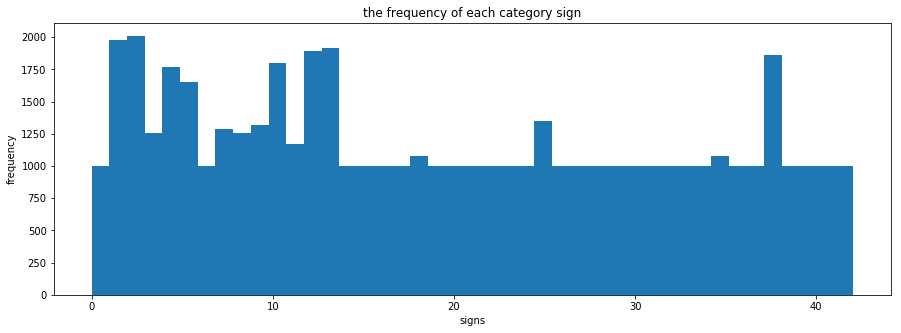

(array([1000., 1980., 2010., 1260., 1770., 1650., 1000., 1290., 1260.,
        1320., 1800., 1170., 1890., 1920., 1000., 1000., 1000., 1000.,
        1080., 1000., 1000., 1000., 1000., 1000., 1000., 1350., 1000.,
        1000., 1000., 1000., 1000., 1000., 1000., 1000., 1000., 1080.,
        1000., 1000., 1860., 1000., 1000., 1000., 1000.]),
 array([ 0.        ,  0.97674419,  1.95348837,  2.93023256,  3.90697674,
         4.88372093,  5.86046512,  6.8372093 ,  7.81395349,  8.79069767,
         9.76744186, 10.74418605, 11.72093023, 12.69767442, 13.6744186 ,
        14.65116279, 15.62790698, 16.60465116, 17.58139535, 18.55813953,
        19.53488372, 20.51162791, 21.48837209, 22.46511628, 23.44186047,
        24.41860465, 25.39534884, 26.37209302, 27.34883721, 28.3255814 ,
        29.30232558, 30.27906977, 31.25581395, 32.23255814, 33.20930233,
        34.18604651, 35.1627907 , 36.13953488, 37.11627907, 38.09302326,
        39.06976744, 40.04651163, 41.02325581, 42.        ]),
 <a list of

In [0]:
# 数据重采样，使样本个数分配均匀
bin_edges = hist[1]
bin_centers = (bin_edges[1:] + bin_edges[0:len(bin_edges)-1])/2
for i in range(len(bin_centers)):
    if hist[0][i] < 1000:
        train_data = [X_train[j] for j in range(len(y_train)) if y_train[j] == i]
        need_resample_num = int(1000 - hist[0][i])
        new_data_x = [np.copy(train_data[np.random.randint(len(train_data))]) for k in range(need_resample_num)]
        new_data_y = [i for x in range(need_resample_num)]
        X_train = np.vstack((X_train, np.array(new_data_x)))
        y_train = np.hstack((y_train, np.array(new_data_y)))
print(X_train.shape)
print(y_train.shape)
plot_y_train_hist()

**二、数据预处理**

(32, 32, 3)


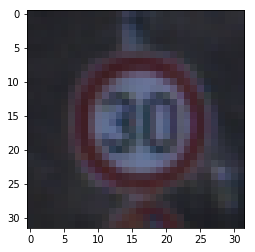

In [0]:
# 源图像
src = X_train[4000]
plt.imshow(src)
print(src.shape)

(32, 32)


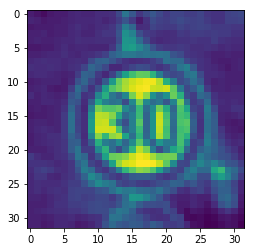

In [0]:
# 转为灰度图像
import cv2

dst = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)
plt.imshow(dst)
print(dst.shape)

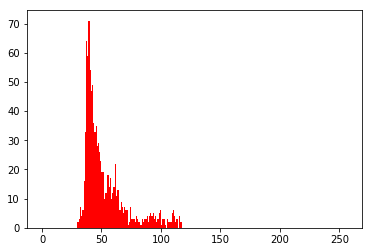

In [0]:
# 灰度图的直方图
plt.hist(dst.ravel(),256,[0,256],color="r")
plt.show()

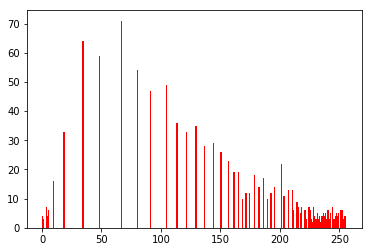

In [0]:
# 灰度图的直方图均衡化
dst2 = cv2.equalizeHist(dst)
plt.hist(dst2.ravel(),256,[0,256],color="r")
plt.show()

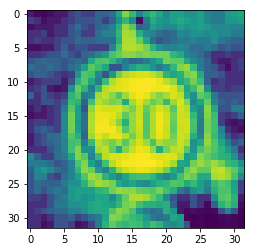

In [0]:
# 查看直方图均衡化的图片
plt.imshow(dst2)

In [0]:
# 增加维度
print(dst2.shape)
dst3 = np.expand_dims(dst2,2)
print(dst3.shape)

(32, 32)
(32, 32, 1)


In [0]:
# 归一化处理
dst4 = np.array(dst3,dtype=np.float32)
dst4 = (dst4-128)/128

In [0]:
# 查看一下归一化处理后的图像数据
dst4[0]

array([[-0.859375 ],
       [-0.9609375],
       [-0.9765625],
       [-0.9296875],
       [-0.859375 ],
       [-0.859375 ],
       [-0.625    ],
       [-0.484375 ],
       [-0.625    ],
       [-0.625    ],
       [-0.375    ],
       [-0.375    ],
       [-0.2890625],
       [ 0.171875 ],
       [ 0.6171875],
       [ 0.3359375],
       [-0.1171875],
       [ 0.171875 ],
       [ 0.3359375],
       [ 0.171875 ],
       [-0.0546875],
       [ 0.125    ],
       [ 0.125    ],
       [ 0.0078125],
       [ 0.0078125],
       [ 0.125    ],
       [-0.1171875],
       [-0.1875   ],
       [-0.1875   ],
       [ 0.0625   ],
       [ 0.125    ],
       [ 0.171875 ]], dtype=float32)

In [0]:
# 封装数据预处理的方法
import cv2

def preprocess_features(X, equalize_hist=True):
    normalized_X = []
    for i in range(len(X)):
        # Convert from RGB to YUV
        yuv_img = cv2.cvtColor(X[i], cv2.COLOR_RGB2YUV)
        yuv_img_v = X[i][:, :, 0]
        # equalizeHist
        yuv_img_v = cv2.equalizeHist(yuv_img_v)
        # expand_dis
        yuv_img_v = np.expand_dims(yuv_img_v, 2)
        normalized_X.append(yuv_img_v)
    # normalize
    normalized_X = np.array(normalized_X, dtype=np.float32)
    normalized_X = (normalized_X-128)/128
    # normalized_X /= (np.std(normalized_X, axis=0) + np.finfo('float32').eps)
    return normalized_X

In [0]:
# 对数据集整体进行处理
X_train_normalized = preprocess_features(X_train)
X_valid_normalized = preprocess_features(X_valid)
X_test_normalized = preprocess_features(X_test)

In [0]:
# 将数据集打乱
from sklearn.utils import shuffle
X_train_normalized,y_train = shuffle(X_train_normalized,y_train)

Using TensorFlow backend.


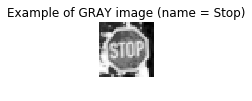

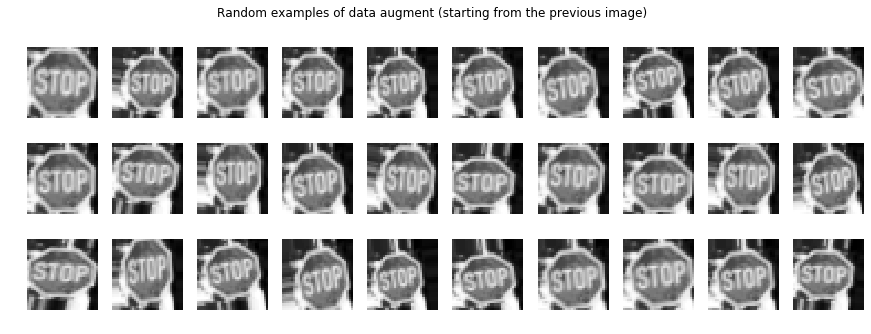

In [0]:
# 数据增强
from keras.preprocessing.image import ImageDataGenerator

# 图像数据生成器
image_datagen = ImageDataGenerator(rotation_range = 10.,
                                   zoom_range = 0.2,
                                   width_shift_range =  0.08,
                                   height_shift_range = 0.08
                                  )

# 从训练集随意选取一张图片
index = np.random.randint(0, len(X_train_normalized))
img = X_train_normalized[index]

# 展示原始图片
plt.figure(figsize=(1, 1))
plt.imshow(np.squeeze(img), cmap="gray")
plt.title('Example of GRAY image (name = {})'.format(id_to_name(y_train[index])))
plt.axis('off')
plt.show()

# 展示数据增强生成的图片
fig, ax_array = plt.subplots(3, 10, figsize=(15, 5))
for ax in ax_array.ravel():
    images = np.expand_dims(img, 0)
    # np.expand_dims(img, 0) means add dim
    augmented_img, _ = image_datagen.flow(np.expand_dims(img, 0), np.expand_dims(y_train[index], 0)).next()
    #augmented_img=preprocess_features(augmented_img)
    ax.imshow(augmented_img.squeeze(), cmap="gray")
    ax.axis('off')
plt.suptitle('Random examples of data augment (starting from the previous image)')
plt.show()

In [0]:
print("Number of training examples =",X_train.shape[0])

Number of training examples = 51690


In [0]:
# 对标签数据进行one-hot编码
from keras.utils  import np_utils
print("Shape before one-hot encoding:",y_train.shape)
Y_train = np_utils.to_categorical(y_train,n_classes)
Y_valid = np_utils.to_categorical(y_valid,n_classes)
Y_test = np_utils.to_categorical(y_test,n_classes)
print("Shape after one-hot encoding:",Y_train.shape)

Shape before one-hot encoding: (51690,)
Shape after one-hot encoding: (51690, 43)


In [0]:
print(y_train[0])
print(Y_train[0])

24
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**三、交通标志牌的识别模型搭建**

**1.2层Conv2D+1层MaxPooling2D+1层Drop(0.25)+1层Flatten+1层Dense+1层Dropout层(0.5)+1层Dense**

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()
## Feature Extraction
# 第1层卷积，32个3x3的卷积核 ，激活函数使用 relu
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu',
                 input_shape=X_train_normalized.shape[1:]))

# 第2层卷积，64个3x3的卷积核，激活函数使用 relu
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))

# 最大池化层，池化窗口 2x2
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout 25% 的输入神经元
model.add(Dropout(0.25))

# 将 Pooled feature map 摊平后输入全连接网络
model.add(Flatten())

## Classification
# 全联接层
model.add(Dense(128, activation='relu'))

# Dropout 50% 的输入神经元
model.add(Dropout(0.5))

# 使用 softmax 激活函数做多分类，输出各类别的概率
model.add(Dense(n_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# 查看模型的结构
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1605760   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [0]:
# 编译模型
model.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],
              optimizer="adam")

In [0]:
# 训练模型
history = model.fit(X_train_normalized,
                    Y_train,
                    batch_size=256,
                    epochs=120,
                    verbose=2,
                    validation_data=(X_valid_normalized,Y_valid))     

Instructions for updating:
Use tf.cast instead.
Train on 51690 samples, validate on 4410 samples
Epoch 1/120
 - 7s - loss: 1.2242 - acc: 0.6591 - val_loss: 0.3351 - val_acc: 0.8957
Epoch 2/120
 - 4s - loss: 0.2724 - acc: 0.9174 - val_loss: 0.2139 - val_acc: 0.9370
Epoch 3/120
 - 4s - loss: 0.1670 - acc: 0.9492 - val_loss: 0.1646 - val_acc: 0.9490
Epoch 4/120
 - 4s - loss: 0.1190 - acc: 0.9622 - val_loss: 0.1639 - val_acc: 0.9467
Epoch 5/120
 - 4s - loss: 0.0910 - acc: 0.9709 - val_loss: 0.1620 - val_acc: 0.9537
Epoch 6/120
 - 4s - loss: 0.0770 - acc: 0.9752 - val_loss: 0.1439 - val_acc: 0.9585
Epoch 7/120
 - 4s - loss: 0.0656 - acc: 0.9795 - val_loss: 0.1304 - val_acc: 0.9587
Epoch 8/120
 - 4s - loss: 0.0572 - acc: 0.9809 - val_loss: 0.1411 - val_acc: 0.9601
Epoch 9/120
 - 4s - loss: 0.0514 - acc: 0.9835 - val_loss: 0.1529 - val_acc: 0.9562
Epoch 10/120
 - 4s - loss: 0.0473 - acc: 0.9847 - val_loss: 0.1166 - val_acc: 0.9642
Epoch 11/120
 - 4s - loss: 0.0427 - acc: 0.9863 - val_loss: 0.

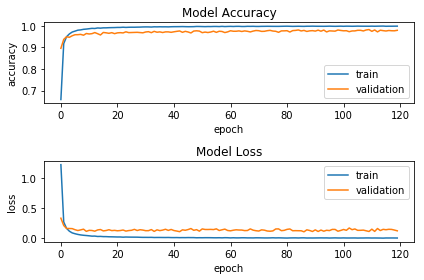

In [0]:
# 可视化指标
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.tight_layout()

plt.show()

In [0]:
# 保存模型
import os
import tensorflow.gfile as gfile

save_dir = "/content/drive/model/v1/"

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = 'keras_traffic_1.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/model/v1/keras_traffic_1.h5 


In [0]:
# 加载模型
from keras.models import load_model

traffic_model = load_model(model_path)

In [0]:
# 统计模型在测试集上的分类结果
loss_and_metrics = traffic_model.evaluate(X_test_normalized, Y_test, verbose=2,batch_size=256)
    
print("Test Loss: {}".format(loss_and_metrics[0]))
print("Test Accuracy: {}%".format(loss_and_metrics[1]*100))

predicted_classes = traffic_model.predict_classes(X_test_normalized)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("Classified correctly count: {}".format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))

Test Loss: 0.22923571624080058
Test Accuracy: 96.88836103380434%
Classified correctly count: 12237
Classified incorrectly count: 393


**2.3层Con2D MaxPooling2D+1层Flatten层+2层Dense**

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D

model2 = Sequential()

# layers1
model2.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=X_train_normalized.shape[1:],
                 activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))

# layers2
model2.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))

# layers3
model2.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation="relu"))
model2.add(MaxPooling2D(pool_size=(2,2)))

# flattern
model2.add(Flatten())

# Dense
model2.add(Dense(512,activation="relu"))


# Dense
model2.add(Dense(n_classes,activation="softmax"))

In [0]:
# 查看模型的结构
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 256)               0         
__________

In [0]:
# 编译模型
model2.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],
              optimizer="adam")

In [0]:
# 训练模型
history2 = model2.fit(X_train_normalized,
                    Y_train,
                    batch_size=256,
                    epochs=120,
                    verbose=2,
                    validation_data=(X_valid_normalized,Y_valid))                    

Train on 51690 samples, validate on 4410 samples
Epoch 1/120
 - 2s - loss: 1.3340 - acc: 0.6319 - val_loss: 0.6667 - val_acc: 0.8041
Epoch 2/120
 - 2s - loss: 0.2375 - acc: 0.9308 - val_loss: 0.4388 - val_acc: 0.8762
Epoch 3/120
 - 2s - loss: 0.1122 - acc: 0.9669 - val_loss: 0.3823 - val_acc: 0.8964
Epoch 4/120
 - 2s - loss: 0.0769 - acc: 0.9775 - val_loss: 0.3509 - val_acc: 0.9036
Epoch 5/120
 - 2s - loss: 0.0508 - acc: 0.9857 - val_loss: 0.3434 - val_acc: 0.9088
Epoch 6/120
 - 2s - loss: 0.0420 - acc: 0.9874 - val_loss: 0.3413 - val_acc: 0.9204
Epoch 7/120
 - 2s - loss: 0.0297 - acc: 0.9912 - val_loss: 0.3266 - val_acc: 0.9243
Epoch 8/120
 - 2s - loss: 0.0198 - acc: 0.9943 - val_loss: 0.3150 - val_acc: 0.9256
Epoch 9/120
 - 2s - loss: 0.0205 - acc: 0.9940 - val_loss: 0.3463 - val_acc: 0.9200
Epoch 10/120
 - 2s - loss: 0.0174 - acc: 0.9947 - val_loss: 0.3045 - val_acc: 0.9236
Epoch 11/120
 - 2s - loss: 0.0194 - acc: 0.9943 - val_loss: 0.3561 - val_acc: 0.9184
Epoch 12/120
 - 2s - loss

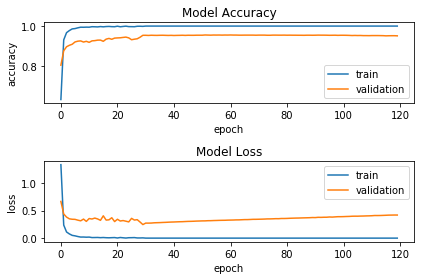

In [0]:
# 可视化指标
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history2.history['acc'])
plt.plot(history2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.tight_layout()

plt.show()

In [0]:
# 保存模型
import os
import tensorflow.gfile as gfile

save_dir = "/content/drive/model/v2/"

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = 'keras_traffic_2.h5'
model_path = os.path.join(save_dir, model_name)

model2.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/model/v2/keras_traffic_2.h5 


In [0]:
# 加载模型
from keras.models import load_model

traffic_model = load_model(model_path)

In [0]:
# 统计模型在测试集上的分类结果
loss_and_metrics = traffic_model.evaluate(X_test_normalized, Y_test, verbose=2,batch_size=256)
    
print("Test Loss: {}".format(loss_and_metrics[0]))
print("Test Accuracy: {}%".format(loss_and_metrics[1]*100))

predicted_classes = traffic_model.predict_classes(X_test_normalized)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("Classified correctly count: {}".format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))

Test Loss: 0.6938359957692742
Test Accuracy: 93.08788600368152%
Classified correctly count: 11757
Classified incorrectly count: 873


**3.对上述模型进行改进 增加2层Dropout层** 

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D

model3 = Sequential()

# layers1
model3.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=X_train_normalized.shape[1:],
                 activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2)))

# layers2
model3.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model3.add(Dropout(0.25))

# layers3
model3.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation="relu"))
model3.add(MaxPooling2D(pool_size=(2,2)))

# flattern
model3.add(Flatten())

# Dense
model3.add(Dense(512,activation="relu"))

# Dropout
model3.add(Dropout(0.5))

# Dense
model3.add(Dense(n_classes,activation="softmax"))

In [0]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 2, 2, 64)          0         
__________

In [0]:
# 编译模型
model3.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],
              optimizer="adam")

In [0]:
# 训练模型
history3 = model3.fit(X_train_normalized,
                    Y_train,
                    batch_size=256,
                    epochs=120,
                    verbose=2,
                    validation_data=(X_valid_normalized,Y_valid))                    

Train on 51690 samples, validate on 4410 samples
Epoch 1/120
 - 2s - loss: 1.8536 - acc: 0.4729 - val_loss: 0.6255 - val_acc: 0.8197
Epoch 2/120
 - 2s - loss: 0.4513 - acc: 0.8609 - val_loss: 0.3030 - val_acc: 0.9082
Epoch 3/120
 - 2s - loss: 0.2391 - acc: 0.9261 - val_loss: 0.2413 - val_acc: 0.9272
Epoch 4/120
 - 2s - loss: 0.1676 - acc: 0.9480 - val_loss: 0.2010 - val_acc: 0.9401
Epoch 5/120
 - 2s - loss: 0.1248 - acc: 0.9610 - val_loss: 0.1635 - val_acc: 0.9519
Epoch 6/120
 - 2s - loss: 0.1006 - acc: 0.9692 - val_loss: 0.1346 - val_acc: 0.9619
Epoch 7/120
 - 2s - loss: 0.0848 - acc: 0.9736 - val_loss: 0.1464 - val_acc: 0.9553
Epoch 8/120
 - 2s - loss: 0.0731 - acc: 0.9765 - val_loss: 0.1513 - val_acc: 0.9526
Epoch 9/120
 - 2s - loss: 0.0664 - acc: 0.9785 - val_loss: 0.1365 - val_acc: 0.9580
Epoch 10/120
 - 2s - loss: 0.0590 - acc: 0.9810 - val_loss: 0.1404 - val_acc: 0.9553
Epoch 11/120
 - 2s - loss: 0.0493 - acc: 0.9838 - val_loss: 0.1258 - val_acc: 0.9646
Epoch 12/120
 - 2s - loss

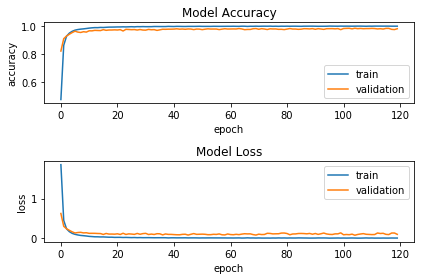

In [0]:
# 可视化指标
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.tight_layout()

plt.show()

In [0]:
# 保存模型
import os
import tensorflow.gfile as gfile

save_dir = "/content/drive/model/v3/"

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = 'keras_traffic_3.h5'
model_path = os.path.join(save_dir, model_name)

model3.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at /content/drive/model/v3/keras_traffic_3.h5 


In [0]:
# 加载模型
from keras.models import load_model

traffic_model = load_model(model_path)

In [0]:
# 统计模型在测试集上的分类结果
loss_and_metrics = traffic_model.evaluate(X_test_normalized, Y_test, verbose=2,batch_size=256)
    
print("Test Loss: {}".format(loss_and_metrics[0]))
print("Test Accuracy: {}%".format(loss_and_metrics[1]*100))

predicted_classes = traffic_model.predict_classes(X_test_normalized)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("Classified correctly count: {}".format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))

Test Loss: 0.2989197100426409
Test Accuracy: 95.88281867056732%
Classified correctly count: 12110
Classified incorrectly count: 520


**4.2层卷积池化层+1层展开层+3层全连接层**

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D

model4 = Sequential()

# layers1
model4.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=X_train_normalized.shape[1:],
                 activation="relu"))
model4.add(MaxPooling2D(pool_size=(2,2)))

# layers2
model4.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation="relu"))
model4.add(MaxPooling2D(pool_size=(2,2)))



# flattern
model4.add(Flatten())

# Dense
model4.add(Dense(512,activation="relu"))

# Dense
model4.add(Dense(100,activation="relu"))

# Dense
model4.add(Dense(n_classes,activation="softmax"))

In [0]:
# 查看模型的结构
model4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1180160   
_________________________________________________________________
dense_8 (Dense)              (None, 100)               51300     
__________

In [0]:
# 编译模型
model4.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],
              optimizer="adam")

In [0]:
# 训练模型
history4 = model4.fit(X_train_normalized,
                    Y_train,
                    batch_size=256,
                    epochs=120,
                    verbose=2,
                    validation_data=(X_valid_normalized,Y_valid))                    

Train on 51690 samples, validate on 4410 samples
Epoch 1/120
 - 3s - loss: 0.9466 - acc: 0.7433 - val_loss: 0.4214 - val_acc: 0.8746
Epoch 2/120
 - 2s - loss: 0.1339 - acc: 0.9632 - val_loss: 0.3042 - val_acc: 0.9152
Epoch 3/120
 - 2s - loss: 0.0681 - acc: 0.9809 - val_loss: 0.2988 - val_acc: 0.9170
Epoch 4/120
 - 2s - loss: 0.0414 - acc: 0.9885 - val_loss: 0.3027 - val_acc: 0.9125
Epoch 5/120
 - 2s - loss: 0.0244 - acc: 0.9934 - val_loss: 0.2754 - val_acc: 0.9308
Epoch 6/120
 - 2s - loss: 0.0198 - acc: 0.9944 - val_loss: 0.2664 - val_acc: 0.9299
Epoch 7/120
 - 2s - loss: 0.0139 - acc: 0.9963 - val_loss: 0.3340 - val_acc: 0.9197
Epoch 8/120
 - 2s - loss: 0.0150 - acc: 0.9958 - val_loss: 0.2918 - val_acc: 0.9336
Epoch 9/120
 - 2s - loss: 0.0166 - acc: 0.9948 - val_loss: 0.2496 - val_acc: 0.9399
Epoch 10/120
 - 2s - loss: 0.0070 - acc: 0.9979 - val_loss: 0.2661 - val_acc: 0.9365
Epoch 11/120
 - 2s - loss: 0.0060 - acc: 0.9984 - val_loss: 0.3019 - val_acc: 0.9290
Epoch 12/120
 - 2s - loss

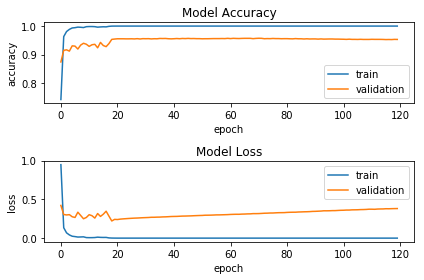

In [0]:
# 可视化指标
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.tight_layout()

plt.show()


In [0]:
# 保存模型
import os
import tensorflow.gfile as gfile

save_dir = "/content/drive/model/v4/"

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = 'keras_traffic_4.h5'
model_path = os.path.join(save_dir, model_name)

model4.save(model_path)
print('Saved trained model at %s ' % model_path)


Saved trained model at /content/drive/model/v4/keras_traffic_4.h5 


In [0]:
# 加载模型
from keras.models import load_model

traffic_model = load_model(model_path)

In [0]:
# 统计模型在测试集上的分类结果
loss_and_metrics = traffic_model.evaluate(X_test_normalized, Y_test, verbose=2,batch_size=256)
    
print("Test Loss: {}".format(loss_and_metrics[0]))
print("Test Accuracy: {}%".format(loss_and_metrics[1]*100))

predicted_classes = traffic_model.predict_classes(X_test_normalized)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("Classified correctly count: {}".format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))

Test Loss: 0.61759698928016
Test Accuracy: 93.18289788016608%
Classified correctly count: 11769
Classified incorrectly count: 861


**5.对上述模型进行改进增加3层Dropout层**

In [0]:
# 改进模型
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
from keras.layers import Conv2D,MaxPooling2D

model5 = Sequential()

# layers1
model5.add(Conv2D(filters=32,
                 kernel_size=(3,3),
                 input_shape=X_train_normalized.shape[1:],
                 activation="relu"))
model5.add(MaxPooling2D(pool_size=(2,2)))



# layers2
model5.add(Conv2D(filters=64,
                 kernel_size=(3,3),
                 activation="relu"))
model5.add(MaxPooling2D(pool_size=(2,2)))

# Dropout
model5.add(Dropout(0.5))

# flattern
model5.add(Flatten())

# Dense
model5.add(Dense(512,activation="relu"))

# Dropout
model5.add(Dropout(0.5))

# Dense
model5.add(Dense(100,activation="relu"))

# Dropout
model5.add(Dropout(0.5))

# Dense
model5.add(Dense(n_classes,activation="softmax"))

In [0]:
model5.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               1180160   
__________

In [0]:
# 编译模型
model5.compile(loss="categorical_crossentropy",
              metrics=["accuracy"],
              optimizer="adam")

In [0]:
# 训练模型
history5 = model5.fit(X_train_normalized,
                    Y_train,
                    batch_size=256,
                    epochs=120,
                    verbose=2,
                    validation_data=(X_valid_normalized,Y_valid))                    


Train on 51690 samples, validate on 4410 samples
Epoch 1/120
 - 3s - loss: 2.0740 - acc: 0.4183 - val_loss: 0.5267 - val_acc: 0.8590
Epoch 2/120
 - 2s - loss: 0.5917 - acc: 0.8149 - val_loss: 0.2372 - val_acc: 0.9395
Epoch 3/120
 - 2s - loss: 0.3512 - acc: 0.8919 - val_loss: 0.1723 - val_acc: 0.9508
Epoch 4/120
 - 2s - loss: 0.2560 - acc: 0.9214 - val_loss: 0.1449 - val_acc: 0.9583
Epoch 5/120
 - 2s - loss: 0.2048 - acc: 0.9382 - val_loss: 0.1341 - val_acc: 0.9590
Epoch 6/120
 - 2s - loss: 0.1682 - acc: 0.9497 - val_loss: 0.1183 - val_acc: 0.9655
Epoch 7/120
 - 2s - loss: 0.1406 - acc: 0.9573 - val_loss: 0.1070 - val_acc: 0.9698
Epoch 8/120
 - 2s - loss: 0.1288 - acc: 0.9604 - val_loss: 0.1037 - val_acc: 0.9667
Epoch 9/120
 - 2s - loss: 0.1175 - acc: 0.9641 - val_loss: 0.1056 - val_acc: 0.9685
Epoch 10/120
 - 2s - loss: 0.1016 - acc: 0.9690 - val_loss: 0.0935 - val_acc: 0.9696
Epoch 11/120
 - 2s - loss: 0.0940 - acc: 0.9709 - val_loss: 0.0856 - val_acc: 0.9741
Epoch 12/120
 - 2s - loss

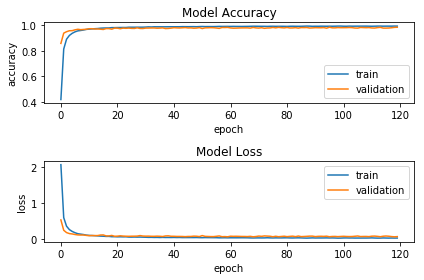

In [0]:
# 可视化指标
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history5.history['acc'])
plt.plot(history5.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.tight_layout()

plt.show()

In [0]:
# 保存模型
import os
import tensorflow.gfile as gfile

save_dir = "/content/drive/model/v5/"

if gfile.Exists(save_dir):
    gfile.DeleteRecursively(save_dir)
gfile.MakeDirs(save_dir)

model_name = 'keras_traffic_5.h5'
model_path = os.path.join(save_dir, model_name)

model5.save(model_path)
print('Saved trained model at %s ' % model_path)


Saved trained model at /content/drive/model/v5/keras_traffic_5.h5 


In [0]:
# 加载模型
from keras.models import load_model

traffic_model = load_model(model_path)

In [0]:
# 统计模型在测试集上的分类结果
loss_and_metrics = traffic_model.evaluate(X_test_normalized, Y_test, verbose=2,batch_size=256)
    
print("Test Loss: {}".format(loss_and_metrics[0]))
print("Test Accuracy: {}%".format(loss_and_metrics[1]*100))

predicted_classes = traffic_model.predict_classes(X_test_normalized)

correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print("Classified correctly count: {}".format(len(correct_indices)))
print("Classified incorrectly count: {}".format(len(incorrect_indices)))

Test Loss: 0.15594110083032578
Test Accuracy: 96.76167853182493%
Classified correctly count: 12221
Classified incorrectly count: 409
